In [38]:
import numpy as np
import pandas as pd
import io
import itertools

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from collections import Counter
import pickle as pkl
import random
import pdb
from sklearn.model_selection import train_test_split


PAD_IDX = 0
UNK_IDX = 1
BATCH_SIZE = 32
NUM_CLASSES = 3
BIDIRECTIONAL = True
NUM_DIRECTIONS = 1 if not BIDIRECTIONAL else 2
RNN_HIDDEN_SIZE = 200
LIN_HIDDEN_SIZE = 256

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
cnn_cv = pkl.load(open('df_cnn_cv_correct.pkl','rb'))

In [23]:
rnn_cv = pkl.load(open('df_rnn_cv.pkl','rb'))

## Changes in Kernel Size plots

In [68]:
cnn_cv_kernel = cnn_cv[(cnn_cv['interaction_type'] == 'concat') & (cnn_cv['hidden_size'] == 512)]

In [69]:
cnn_cv_kernel

,hidden_size,kernel_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch
4,512,3,concat,"[1.05642569065094, 1.258065938949585, 1.079990...","[52.7, 53.1, 57.1, 55.6, 59.7, 59.4, 59.9, 60....",70.9,87
6,512,5,concat,"[1.1203880310058594, 1.1246808767318726, 1.139...","[49.2, 54.6, 55.8, 58.2, 55.2, 60.8, 57.9, 60....",68.2,90


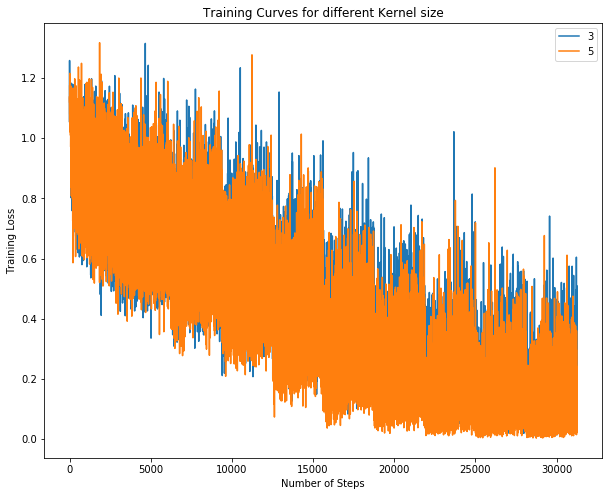

In [70]:
plt.figure(figsize=(10,8))

for i in range(len(cnn_cv_kernel)):
    plt.plot(range(len(cnn_cv_kernel.iloc[i]['train_loss_hist'])),cnn_cv_kernel.iloc[i]['train_loss_hist'],label=str(cnn_cv_kernel.iloc[i]['kernel_size']))
    

plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Training Loss')
plt.title('Training Curves for different Kernel size')
plt.savefig('plots/training_curve_cnn_kernel.png')

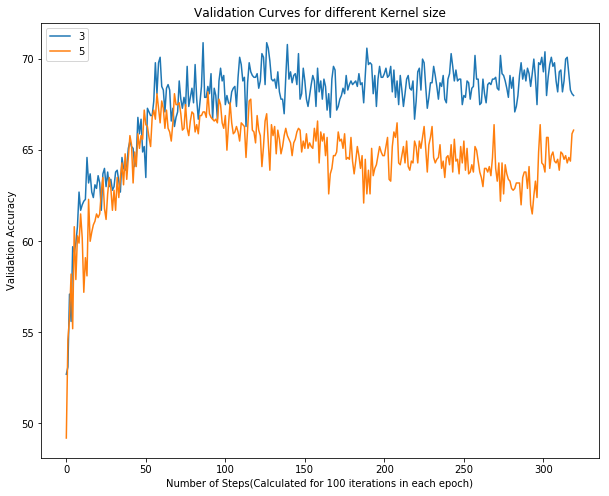

In [71]:
plt.figure(figsize=(10,8))

for i in range(len(cnn_cv_kernel)):
    plt.plot(range(len(cnn_cv_kernel.iloc[i]['val_acc_hist'])),cnn_cv_kernel.iloc[i]['val_acc_hist'],label=str(cnn_cv_kernel.iloc[i]['kernel_size']))
    

plt.legend()
plt.xlabel('Number of Steps(Calculated for 100 iterations in each epoch)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Curves for different Kernel size')
plt.savefig('plots/val_curve_cnn_kernel.png')

## Changing the hidden size

### CNN

In [72]:
cnn_cv_hidden = cnn_cv[(cnn_cv['interaction_type'] == 'concat') & (cnn_cv['kernel_size'] == 3)]

In [73]:
cnn_cv_hidden

,hidden_size,kernel_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch
0,200,3,concat,"[1.3568780422210693, 1.118163824081421, 1.1933...","[44.5, 55.0, 54.5, 56.7, 58.5, 56.8, 60.5, 59....",70.6,150
4,512,3,concat,"[1.05642569065094, 1.258065938949585, 1.079990...","[52.7, 53.1, 57.1, 55.6, 59.7, 59.4, 59.9, 60....",70.9,87


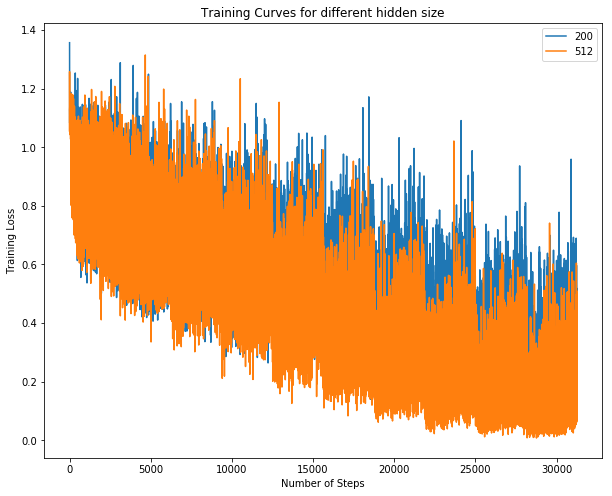

In [74]:
plt.figure(figsize=(10,8))

for i in range(len(cnn_cv_hidden)):
    plt.plot(range(len(cnn_cv_hidden.iloc[i]['train_loss_hist'])),cnn_cv_hidden.iloc[i]['train_loss_hist'],label=str(cnn_cv_hidden.iloc[i]['hidden_size']))
    

plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Training Loss')
plt.title('Training Curves for different hidden size')
plt.savefig('plots/training_curve_cnn_hidden.png')

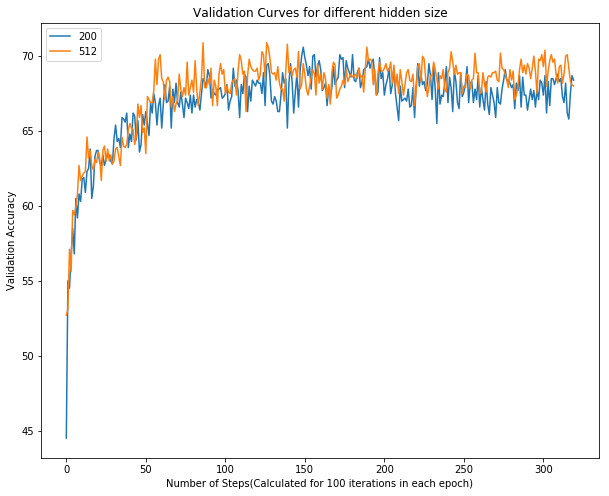

In [75]:
plt.figure(figsize=(10,8))

for i in range(len(cnn_cv_hidden)):
    plt.plot(range(len(cnn_cv_hidden.iloc[i]['val_acc_hist'])),cnn_cv_hidden.iloc[i]['val_acc_hist'],label=str(cnn_cv_hidden.iloc[i]['hidden_size']))
    

plt.legend()
plt.xlabel('Number of Steps(Calculated for 100 iterations in each epoch)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Curves for different hidden size')
plt.savefig('plots/val_curve_cnn_hidden.png')

### RNN

In [24]:
rnn_cv_hidden = rnn_cv[(rnn_cv['interaction_type'] == 'concat')]

In [25]:
rnn_cv_hidden

,hidden_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch
0,200,concat,"[2.3603875637054443, 1.7020633220672607, 1.331...","[36.2, 39.6, 37.1, 40.1, 42.8, 42.9, 41.7, 42....",67.7,310
2,512,concat,"[1.6379724740982056, 1.673852562904358, 1.9998...","[36.6, 38.3, 36.8, 40.2, 37.5, 41.3, 41.1, 43....",69.7,298


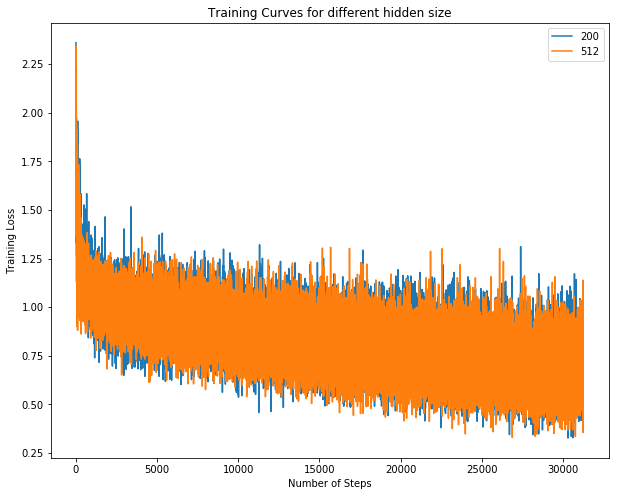

In [26]:
plt.figure(figsize=(10,8))

for i in range(len(rnn_cv_hidden)):
    plt.plot(range(len(rnn_cv_hidden.iloc[i]['train_loss_hist'])),rnn_cv_hidden.iloc[i]['train_loss_hist'],label=str(rnn_cv_hidden.iloc[i]['hidden_size']))
    

plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Training Loss')
plt.title('Training Curves for different hidden size')
plt.savefig('plots/training_curve_rnn_hidden.png')

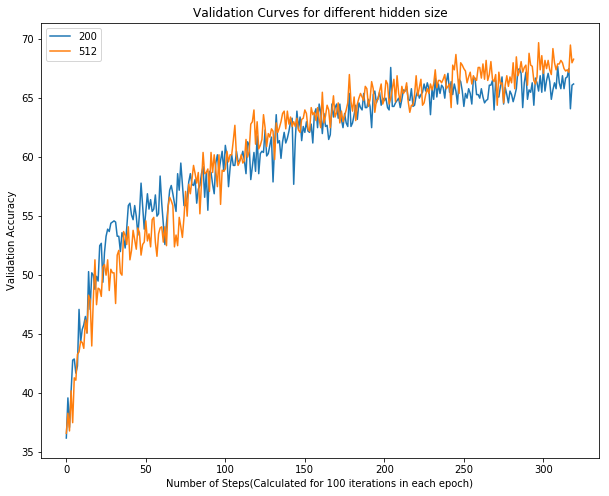

In [27]:
plt.figure(figsize=(10,8))

for i in range(len(rnn_cv_hidden)):
    plt.plot(range(len(rnn_cv_hidden.iloc[i]['val_acc_hist'])),rnn_cv_hidden.iloc[i]['val_acc_hist'],label=str(rnn_cv_hidden.iloc[i]['hidden_size']))
    

plt.legend()
plt.xlabel('Number of Steps(Calculated for 100 iterations in each epoch)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Curves for different hidden size')
plt.savefig('plots/val_curve_rnn_hidden.png')

## Changing the interaction type

In [76]:
cnn_cv_interaction = cnn_cv[(cnn_cv['kernel_size'] == 3) & (cnn_cv['hidden_size'] == 512)]

In [77]:
cnn_cv_interaction

,hidden_size,kernel_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch
4,512,3,concat,"[1.05642569065094, 1.258065938949585, 1.079990...","[52.7, 53.1, 57.1, 55.6, 59.7, 59.4, 59.9, 60....",70.9,87
5,512,3,mul,"[1.3923425674438477, 1.2614350318908691, 1.154...","[35.8, 40.3, 45.0, 48.8, 51.7, 50.9, 52.0, 53....",70.1,120


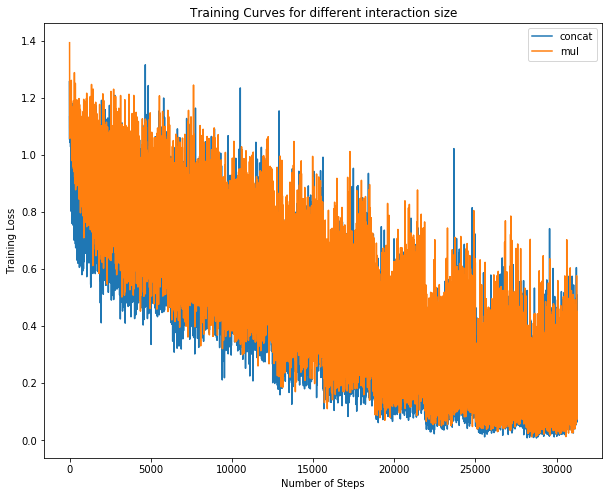

In [78]:
plt.figure(figsize=(10,8))

for i in range(len(cnn_cv_interaction)):
    plt.plot(range(len(cnn_cv_interaction.iloc[i]['train_loss_hist'])),cnn_cv_interaction.iloc[i]['train_loss_hist'],label=str(cnn_cv_interaction.iloc[i]['interaction_type']))
    

plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Training Loss')
plt.title('Training Curves for different interaction size')
plt.savefig('plots/training_curve_cnn_interaction.png')

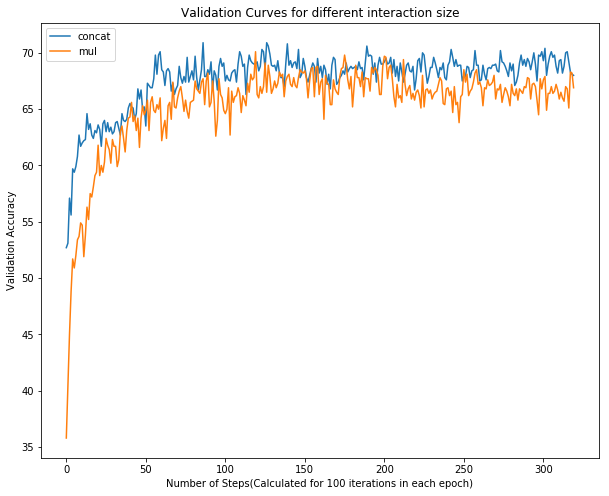

In [79]:
plt.figure(figsize=(10,8))

for i in range(len(cnn_cv_interaction)):
    plt.plot(range(len(cnn_cv_interaction.iloc[i]['val_acc_hist'])),cnn_cv_interaction.iloc[i]['val_acc_hist'],label=str(cnn_cv_interaction.iloc[i]['interaction_type']))
    

plt.legend()
plt.xlabel('Number of Steps(Calculated for 100 iterations in each epoch)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Curves for different interaction size')
plt.savefig('plots/val_curve_cnn_interaction.png')

### RNN

In [28]:
rnn_cv_interaction = rnn_cv[(rnn_cv['hidden_size'] == 512)]

In [29]:
rnn_cv_interaction

,hidden_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch
2,512,concat,"[1.6379724740982056, 1.673852562904358, 1.9998...","[36.6, 38.3, 36.8, 40.2, 37.5, 41.3, 41.1, 43....",69.7,298
3,512,mul,"[2.2068841457366943, 2.4720847606658936, 2.020...","[36.9, 35.4, 34.1, 37.6, 36.3, 39.9, 36.6, 38....",66.9,316


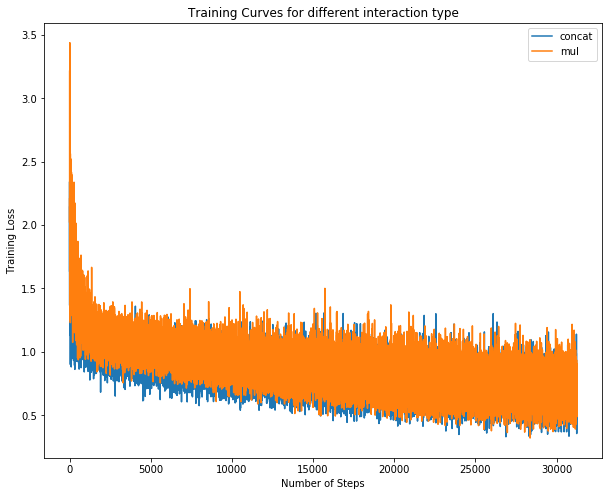

In [30]:
plt.figure(figsize=(10,8))

for i in range(len(rnn_cv_interaction)):
    plt.plot(range(len(rnn_cv_interaction.iloc[i]['train_loss_hist'])),rnn_cv_interaction.iloc[i]['train_loss_hist'],label=str(rnn_cv_interaction.iloc[i]['interaction_type']))
    

plt.legend()
plt.xlabel('Number of Steps')
plt.ylabel('Training Loss')
plt.title('Training Curves for different interaction type')
plt.savefig('plots/training_curve_rnn_interaction.png')

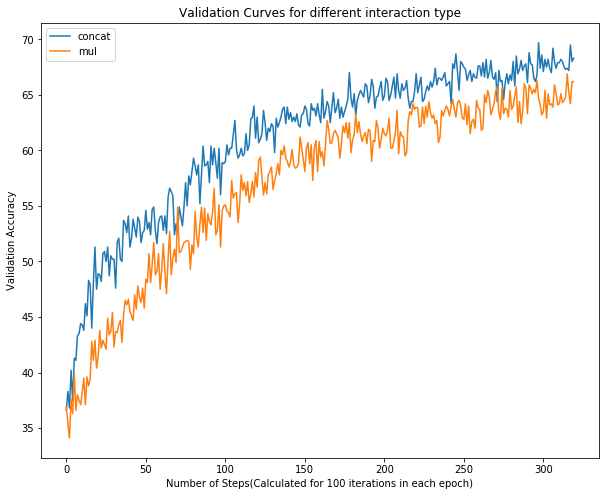

In [31]:
plt.figure(figsize=(10,8))

for i in range(len(rnn_cv_interaction)):
    plt.plot(range(len(rnn_cv_interaction.iloc[i]['val_acc_hist'])),rnn_cv_interaction.iloc[i]['val_acc_hist'],label=str(rnn_cv_interaction.iloc[i]['interaction_type']))
    

plt.legend()
plt.xlabel('Number of Steps(Calculated for 100 iterations in each epoch)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Curves for different interaction type')
plt.savefig('plots/val_curve_rnn_interaction.png')

## CNN Model based on concatanating different kernel sizes graphs

In [32]:
train_loss_hist = pkl.load(open('train_hist_mult_cnn.pkl','rb'))
val_acc_hist = pkl.load(open('val_hist_mult_cnn.pkl','rb'))

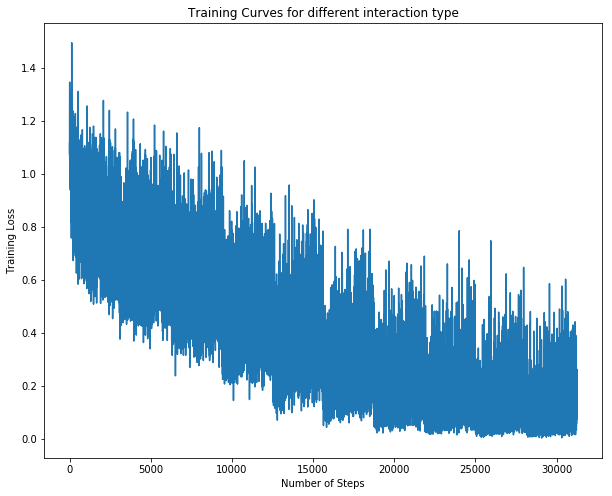

In [34]:
plt.figure(figsize=(10,8))
plt.plot(range(len(train_loss_hist)),train_loss_hist)
plt.xlabel('Number of Steps')
plt.ylabel('Training Loss')
plt.title('Training Curves for different interaction type')
plt.savefig('plots/training_curve_multi_cnn.png')

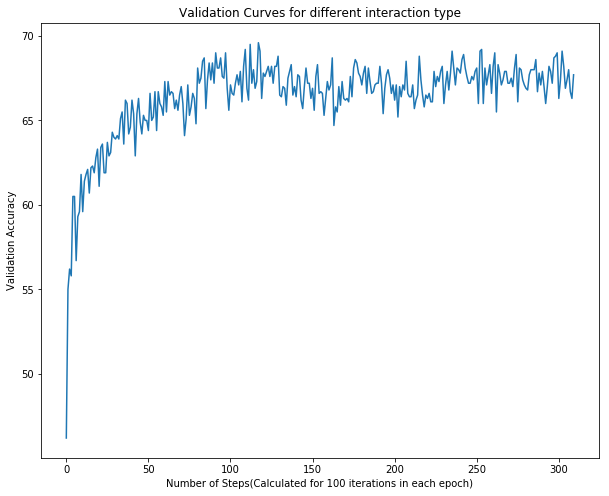

In [33]:
plt.figure(figsize=(10,8))
plt.plot(range(len(val_acc_hist)),val_acc_hist)
plt.xlabel('Number of Steps(Calculated for 100 iterations in each epoch)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Curves for different interaction type')
plt.savefig('plots/val_curve_multi_cnn.png')

## Number of Trainable Params

In [42]:
class RNN(nn.Module):
    def __init__(self, hidden_size, num_layers, vocab_size,weights, bidirectional = True):
        # RNN Accepts the following hyperparams:
        # hidden_size: Hidden Size of layer in RNN
        # num_layers: number of layers in RNN
        # num_classes: number of output classes
        # vocab_size: vocabulary size
        # emb_weights = pretrained embedding weights
        super(RNN, self).__init__()

        self.num_layers, self.hidden_size = num_layers, hidden_size
        self.embedding = nn.Embedding(vocab_size, 300, padding_idx=PAD_IDX)
        self.lstm = nn.LSTM(300,hidden_size, num_layers, batch_first=True,bidirectional=bidirectional)
        self.gru = nn.GRU(300,hidden_size, num_layers, batch_first=True,bidirectional=bidirectional)
        self.num_directions = 1 if not bidirectional else 2
        self.embedding.weight.data.copy_(torch.from_numpy(weights))

    def init_hidden_gru(self, batch_size):
        # Function initializes the activation of recurrent neural net at timestep 0
        # Needs to be in format (num_layers, batch_size, hidden_size)
        hidden = torch.randn(self.num_directions*self.num_layers, batch_size, self.hidden_size).to(DEVICE)
        return hidden
    
    def init_hidden_lstm(self, batch_size):
        # Function initializes the activation of recurrent neural net at timestep 0
        # Needs to be in format (num_directions*num_layers, batch_size, hidden_size)
        hidden = torch.randn(self.num_directions*self.num_layers, batch_size, self.hidden_size).to(DEVICE)
        c_0 = torch.randn(self.num_directions*self.num_layers, batch_size, self.hidden_size).to(DEVICE)
        return hidden, c_0

    def forward(self, x, lengths,masks):
        # reset hidden state
        
        true2sorted = sorted(range(len(lengths)), key=lambda i: -lengths[i])
        sorted2true = sorted(range(len(lengths)), key=lambda i: true2sorted[i])
        #enc_input = torch.stack([enc_input[i, :] for i in true2sorted], dim=1)
        x = x[true2sorted]
        lengths = lengths[true2sorted]

        batch_size, seq_len = x.size()

        #self.hidden, self.c = self.init_hidden_lstm(batch_size)
        self.hidden = self.init_hidden_gru(batch_size)
    
        # get embedding of characters
        embed = self.embedding(x)
        #mask out all others except <UNK> token to freeze their weights
        #print(embed)
        #print(embed.size())
        #print(masks)
        #print(masks.size())
        embed = masks*embed + (1-masks)*embed.clone().detach()
        # pack padded sequence
        embed = torch.nn.utils.rnn.pack_padded_sequence(embed, lengths, batch_first=True)
        # fprop though RNN
        #rnn_out, self.hidden = self.rnn(embed, self.hidden)
        
        #rnn_out, (self.hidden, self.c) = self.lstm(embed, (self.hidden,self.c))
        rnn_out,self.hidden = self.gru(embed,self.hidden)
        # undo packing
        rnn_out, _ = torch.nn.utils.rnn.pad_packed_sequence(rnn_out, batch_first=True)
        rnn_out = rnn_out.view(batch_size,-1,self.num_directions,self.hidden_size)
        # sum hidden activations of RNN across time
        rnn_out = torch.sum(rnn_out, dim=1)
        #concat both directions
        if(self.num_directions == 2):
            out_concat = torch.cat((rnn_out[:,-1,:],rnn_out[:,-2,:]),dim=1)
        else:
            out_concat = torch.cat((rnn_out[:,-1,:]),dim=1)
        #print(out_concat.size())
        out_concat = out_concat[sorted2true]
        return out_concat


In [43]:
class ClassificationNetwork(nn.Module):
    def __init__(self, num_inputs, hidden_size, num_outputs,num_directions=2,interact_type = 'concat'):
        super(ClassificationNetwork, self).__init__()
        # Fully connected and ReLU layers
        if(interact_type == 'concat'):
            self.fc1 = nn.Linear(num_directions*num_inputs*2, hidden_size)
        else:
            self.fc1 = nn.Linear(num_directions*num_inputs, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_outputs)
        self.relu = nn.ReLU(inplace=True)
        #self.dropout = nn.Dropout(p=0.5)
        self.type = interact_type

        # Initialize weights
        self._init_weights()

    def forward(self, embedding_output1, embedding_output2):
        if(self.type == 'concat'):
            input = torch.cat((embedding_output1,embedding_output2),dim=1)
        elif(self.type == 'mul'):
            input = embedding_output1 * embedding_output2
        
        input = input.view(input.size(0), -1) # Reshape input to batch_size x num_inputs
        output = self.fc1(input)
        output = self.relu(output)
        #output = self.dropout(output)
        output = self.fc2(output)
        return output

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.uniform_(m.bias)

In [44]:
class CNN(nn.Module):
    def __init__(self, hidden_size, num_layers, vocab_size,weights,kernel_size = 3):

        super(CNN, self).__init__()

        self.num_layers, self.hidden_size = num_layers, hidden_size
        self.embedding = nn.Embedding(vocab_size, 300, padding_idx=PAD_IDX)
        self.embedding.weight.data.copy_(torch.from_numpy(weights))
        self.kernel_size = kernel_size
        self.conv1 = nn.Conv1d(300, hidden_size, kernel_size=self.kernel_size, padding=1, bias = True)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.conv2 = nn.Conv1d(hidden_size, hidden_size, kernel_size=self.kernel_size, padding=1, bias = True)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        
        self.relu = nn.ReLU()

        #self.linear = nn.Linear(hidden_size, num_classes)
        #self._init_weights()

    def forward(self, x, lengths,masks):
        batch_size, seq_len = x.size()

        embed = self.embedding(x)
        embed = masks*embed + (1-masks)*embed.clone().detach()
        embed = embed.transpose(1,2)
        #hidden = self.conv1(embed.transpose(1,2)).transpose(1,2)
        #hidden = self.relu(hidden.contiguous().view(-1, hidden.size(-1))).view(batch_size, seq_len, hidden.size(-1))      
#         hidden = self.conv2(hidden.transpose(1,2)).transpose(1,2)
#         hidden = self.relu(hidden.contiguous().view(-1, hidden.size(-1))).view(batch_size, seq_len, hidden.size(-1))
        
        #changed to work like a normal conv layer where the final hidden size is:(batch_size,num_filters,output_size)
        #and finally maxpooling over the final output size
        hidden = self.conv1(embed)
        #hidden = self.bn1(hidden)
        hidden = self.relu(hidden)
        hidden = self.conv2(hidden)
        #hidden = self.bn2(hidden)
        hidden = self.relu(hidden)
        #print(hidden.size())
        hidden = torch.max(hidden, dim=2)
        #print(hidden[0].size())
        #logits = self.linear(hidden)
        return hidden[0]
    
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.xavier_normal_(m.weight)
                nn.init.uniform_(m.bias)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.uniform_(m.bias)

In [56]:
token2id = pkl.load(open('token2id.pkl','rb'))
emb_weights = pkl.load(open('emb_weights.pkl','rb'))
id2token = pkl.load(open('id2token.pkl','rb'))


In [57]:
weights_mat = np.zeros((len(token2id),300))
for i in range(2,len(emb_weights)):
    weights_mat[i] = emb_weights[id2token[i]]

weights_mat[1] = np.random.randn(300)

### CNN

In [84]:
cnn_cv['num_params'] = None

In [85]:
def get_trainable_params(network):
    return sum(p.numel() for p in network.parameters() if p.requires_grad)

In [86]:
DEVICE = 'cpu'

In [87]:
for param_i in range(len(cnn_cv)):
    CNN_HIDDEN_SIZE = cnn_cv.iloc[param_i]['hidden_size']
    KERNEL_SIZE = cnn_cv.iloc[param_i]['kernel_size']
    INTERACT_TYPE = cnn_cv.iloc[param_i]['interaction_type']
    
    model = CNN(hidden_size=CNN_HIDDEN_SIZE, num_layers=1, vocab_size=len(token2id),weights=weights_mat,kernel_size=KERNEL_SIZE).to(DEVICE)
    classification_network = ClassificationNetwork(num_inputs=CNN_HIDDEN_SIZE, hidden_size=LIN_HIDDEN_SIZE, num_outputs=NUM_CLASSES,num_directions=1,interact_type=INTERACT_TYPE).to(DEVICE)
    
    num_params_cnn = get_trainable_params(model)
    num_params_cl_network = get_trainable_params(classification_network)
    
    cnn_cv.at[param_i,'num_params'] = num_params_cnn + num_params_cl_network 

In [88]:
cnn_cv

,hidden_size,kernel_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch,num_params
0,200,3,concat,"[1.3568780422210693, 1.118163824081421, 1.1933...","[44.5, 55.0, 54.5, 56.7, 58.5, 56.8, 60.5, 59....",70.6,150,7022327
1,200,3,mul,"[1.2513880729675293, 1.3150625228881836, 1.520...","[34.7, 41.4, 41.1, 44.5, 46.9, 51.1, 51.7, 53....",68.9,185,6971127
2,200,5,concat,"[1.6738693714141846, 1.947834849357605, 1.6222...","[46.8, 53.7, 53.2, 53.6, 54.7, 59.5, 56.5, 58....",67.9,111,7222327
3,200,5,mul,"[1.3545751571655273, 1.2581360340118408, 1.387...","[34.3, 38.3, 48.0, 49.0, 48.6, 51.8, 51.6, 49....",66.1,136,7171127
4,512,3,concat,"[1.05642569065094, 1.258065938949585, 1.079990...","[52.7, 53.1, 57.1, 55.6, 59.7, 59.4, 59.9, 60....",70.9,87,8131175
5,512,3,mul,"[1.3923425674438477, 1.2614350318908691, 1.154...","[35.8, 40.3, 45.0, 48.8, 51.7, 50.9, 52.0, 53....",70.1,120,8000103
6,512,5,concat,"[1.1203880310058594, 1.1246808767318726, 1.139...","[49.2, 54.6, 55.8, 58.2, 55.2, 60.8, 57.9, 60....",68.2,90,8962663
7,512,5,mul,"[1.1433813571929932, 1.2256817817687988, 1.111...","[39.8, 39.0, 44.6, 45.0, 49.6, 52.1, 53.6, 55....",67.1,116,8831591


In [90]:
print(cnn_cv[['hidden_size','kernel_size','interaction_type','num_params']].to_latex(index=False))

\begin{tabular}{rrll}
\toprule
 hidden\_size &  kernel\_size & interaction\_type & num\_params \\
\midrule
         200 &            3 &           concat &    7022327 \\
         200 &            3 &              mul &    6971127 \\
         200 &            5 &           concat &    7222327 \\
         200 &            5 &              mul &    7171127 \\
         512 &            3 &           concat &    8131175 \\
         512 &            3 &              mul &    8000103 \\
         512 &            5 &           concat &    8962663 \\
         512 &            5 &              mul &    8831591 \\
\bottomrule
\end{tabular}



### RNN

In [64]:
rnn_cv['num_params'] = None

In [80]:
for param_i in range(len(rnn_cv)):
    RNN_HIDDEN_SIZE = int(rnn_cv.iloc[param_i]['hidden_size'])
    INTERACT_TYPE = rnn_cv.iloc[param_i]['interaction_type']
    
    model = RNN(hidden_size=RNN_HIDDEN_SIZE, num_layers=1, vocab_size=len(token2id),weights=weights_mat, bidirectional = True).to(DEVICE)
    classification_network = ClassificationNetwork(num_inputs=RNN_HIDDEN_SIZE, hidden_size=LIN_HIDDEN_SIZE, num_outputs=NUM_CLASSES,num_directions=NUM_DIRECTIONS,interact_type=INTERACT_TYPE).to(DEVICE)
    
    num_params_rnn = get_trainable_params(model)
    num_params_cl_network = get_trainable_params(classification_network)
    
    rnn_cv.at[param_i,'num_params'] = num_params_rnn + num_params_cl_network 

In [81]:
rnn_cv

,hidden_size,interaction_type,train_loss_hist,val_acc_hist,max_val_acc,max_val_acc_epoch,num_params,num_prams
0,200,concat,"[2.3603875637054443, 1.7020633220672607, 1.331...","[36.2, 39.6, 37.1, 40.1, 42.8, 42.9, 41.7, 42....",67.7,310,8229127,8229127.0
1,200,mul,"[2.334087610244751, 2.3306643962860107, 2.2329...","[34.3, 35.4, 32.9, 35.6, 36.8, 38.1, 36.3, 36....",67.2,316,8126727,8126727.0
2,512,concat,"[1.6379724740982056, 1.673852562904358, 1.9998...","[36.6, 38.3, 36.8, 40.2, 37.5, 41.3, 41.1, 43....",69.7,298,12977767,12977767.0
3,512,mul,"[2.2068841457366943, 2.4720847606658936, 2.020...","[36.9, 35.4, 34.1, 37.6, 36.3, 39.9, 36.6, 38....",66.9,316,12715623,12715623.0


In [82]:
print(rnn_cv[['hidden_size','interaction_type','num_params']].to_latex(index=False))

\begin{tabular}{rll}
\toprule
 hidden\_size & interaction\_type & num\_params \\
\midrule
         200 &           concat &    8229127 \\
         200 &              mul &    8126727 \\
         512 &           concat &   12977767 \\
         512 &              mul &   12715623 \\
\bottomrule
\end{tabular}

